# Decision Tree -- Random Forest
#### Ben Wilson

Our goal in this lesson is to optimize a decision tree through the random forest algorithm. This will find the right order for our features.

In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as skm
import pylab as pl

# I used another student's pre-cleaned data.
samtrain = pd.read_csv('samtrain.csv')
samval = pd.read_csv('samval.csv')
samtest = pd.read_csv('samtest.csv')
samsungdata = pd.read_csv('samsungdata.csv')
samsungmin = pd.read_csv('samsungmin.csv')

After loading in our data we need to recode our target categories.

In [10]:
activity_map = {
    'laying':1,
    'sitting':2,
    'standing':3,
    'walk':4,
    'walkup':5,
    'walkdown':6
}

samtrain['activity'] = samtrain['activity'].map(lambda x: activity_map[x])
samval['activity'] = samval['activity'].map(lambda x: activity_map[x])
samtest['activity'] = samtest['activity'].map(lambda x: activity_map[x])

Next, let's initialize our random forest classifier, then optimize for it.

In [12]:
rfc = RandomForestClassifier(n_estimators=500, oob_score=True)
train_data = samtrain[samtrain.columns[1:-2]]
train_truth = samtrain['activity']
model = rfc.fit(train_data, train_truth)

# the OOB score is an estimate of our accuracy
print rfc.oob_score_

0.977186311787


Now let's grab the most important features. Those with a feature importance greater than 0.04.

In [17]:
fi = enumerate(rfc.feature_importances_)
cols = samtrain.columns
# List comprehension!
[(value, cols[i]) for (i, value) in fi if value > 0.04]

[(0.046089791956719667, 'tAccMean'),
 (0.047879278053875832, 'tAccStd'),
 (0.043281600823698106, 'tJerkMean'),
 (0.052279415700474799, 'tGyroJerkMagSD'),
 (0.058506557329491157, 'fAccMean'),
 (0.040311812685981899, 'fJerkSD'),
 (0.13377018371907889, 'angleGyroJerkGravity'),
 (0.17852396226954265, 'angleXGravity'),
 (0.042972742227000905, 'angleYGravity')]

In [18]:
val_data = samval[samval.columns[1:-2]]
val_truth = samval['activity']
val_pred = rfc.predict(val_data)

test_data = samtest[samtest.columns[1:-2]]
test_truth = samtest['activity']
test_pred = rfc.predict(test_data)

print("mean accuracy score for validation set = %f" %(rfc.score(val_data, val_truth)))
print("mean accuracy score for test set = %f" %(rfc.score(test_data, test_truth)))

mean accuracy score for validation set = 0.837539
mean accuracy score for test set = 0.896970


It looks like we are doing a decent job deciding which category they should fall into.

Let's see if we can visualize where they might be falling out, or misclassified...

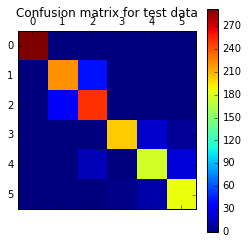

In [20]:
%matplotlib inline
test_cm = skm.confusion_matrix(test_truth, test_pred)

pl.matshow(test_cm)
pl.title('Confusion matrix for test data')
pl.colorbar()
pl.show()

It's great that the confusion matrix is so bright along the diagonal. That means when we call something a 0 _(laying)_ It really is laying, or when something is a 4 _(walkup)_ the person was actually doing that activity.

It seems our biggest point of confusion comes from calling 1 a 2 and 2 a 1. That shows we are mis-classifying standing and sitting.

If you think about the real-world mechanics behind both actions you can justify why the data would have a hard time distinguishing between the two. Both activities have you in a stationairy position with your torso oriented vertically.

We can look at a few more measures to see the performance of our prediction.

In [21]:
# Accuracy
print("Accuracy = %f" %(skm.accuracy_score(test_truth,test_pred)))
# Precision
print("Precision = %f" %(skm.precision_score(test_truth,test_pred)))
# Recall
print("Recall = %f" %(skm.recall_score(test_truth,test_pred)))
# F1 Score
print("F1 score = %f" %(skm.f1_score(test_truth,test_pred)))

Accuracy = 0.896970
Precision = 0.899477
Recall = 0.896970
F1 score = 0.897309


/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1